In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import darksight.helper as helper
import darksight.distributions as distributions
import darksight.classifier as classifier
import darksight.darksight as darksight

/home/kai/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [169]:
klg = helper.Knowledge("./examples/data/lenet-mnist.csv", T=0.7)

[Knowledge.__init__] <class 'torch.FloatTensor'> with size of torch.Size([10000, 10]) is loaded


In [170]:
klg_np = klg.logit.numpy()
p_label = np.argmax(klg_np, axis=1)

In [171]:
D = 2

In [172]:
cond = distributions.Student(klg.C, D)
prior = distributions.Softmax(klg.C)

In [173]:
clf = classifier.CondX(cond, prior)

In [174]:
ds = darksight.DarkSight(klg, clf)

In [175]:
ds.align()

In [176]:
ds.ready(True, 0)

In [177]:
ds.train(2000, 1000, [1e-3, 5e-3, 1e-6], 100, False)

------+-------
Epoch |   Loss
------+-------
  100 | 0.810
  200 | 0.466
  300 | 0.311
  400 | 0.223
  500 | 0.168
  600 | 0.131
  700 | 0.104
  800 | 0.086
  900 | 0.072
 1000 | 0.061
 1100 | 0.054
 1200 | 0.048
 1300 | 0.043
 1400 | 0.039
 1500 | 0.037
 1600 | 0.035
 1700 | 0.033
 1800 | 0.032
 1900 | 0.030
 2000 | 0.030
Time used: 88.304484


In [178]:
y_np = ds.y.data.cpu().numpy()

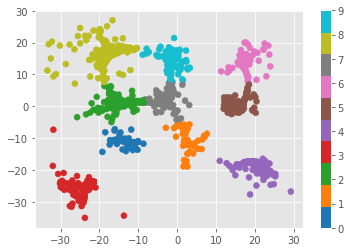

In [179]:
plt.scatter(y_np[:,0], y_np[:,1], c=p_label, cmap="tab10")
plt.colorbar()